In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('titanic_train.csv')

In [22]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
sns.set_style('darkgrid')

<Axes: xlabel='Sex', ylabel='count'>

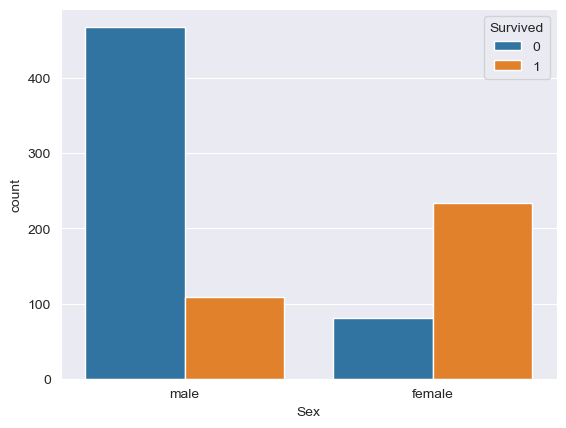

In [11]:
##male female percentage according to survival
sns.countplot(x='Sex',hue='Survived',data=df)

Observation
1. we can see that most of male are dead compare to female


In [15]:
#check for nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation
we can conclude that age and cabin and embarked has null values

<Axes: >

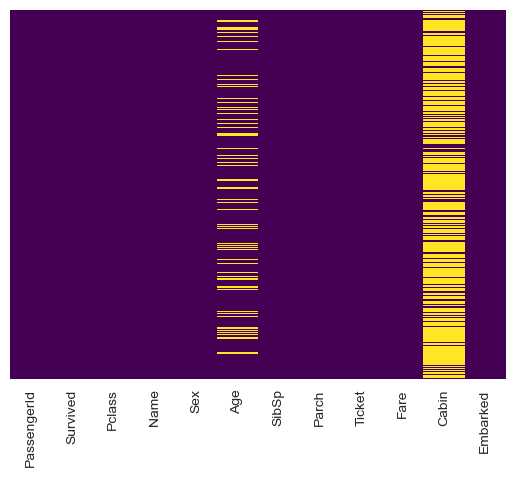

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Pclass', ylabel='Fare'>

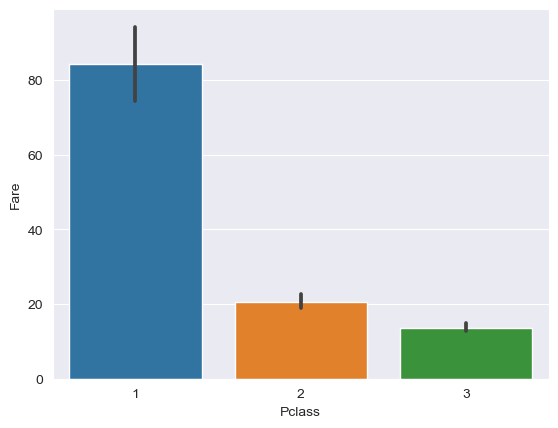

In [24]:
sns.barplot(x='Pclass',y='Fare',data=df)

so, we can cocnlude that Pcclass 1 is taking more money then 2 and finally 3

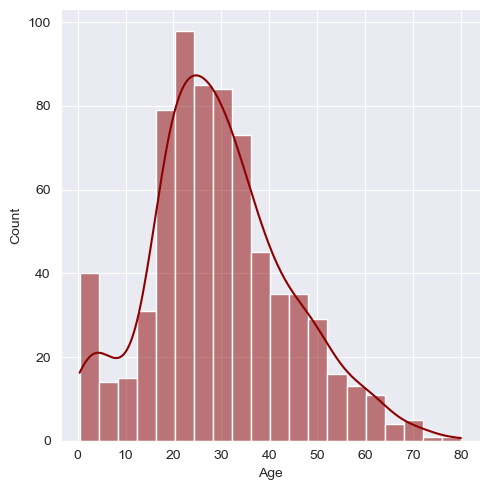

In [29]:
#find the age of people who survivde mostly
#dropna for drop the null values
sns.displot(df['Age'].dropna(),color='darkred',kde='true')

<Axes: xlabel='Pclass', ylabel='Age'>

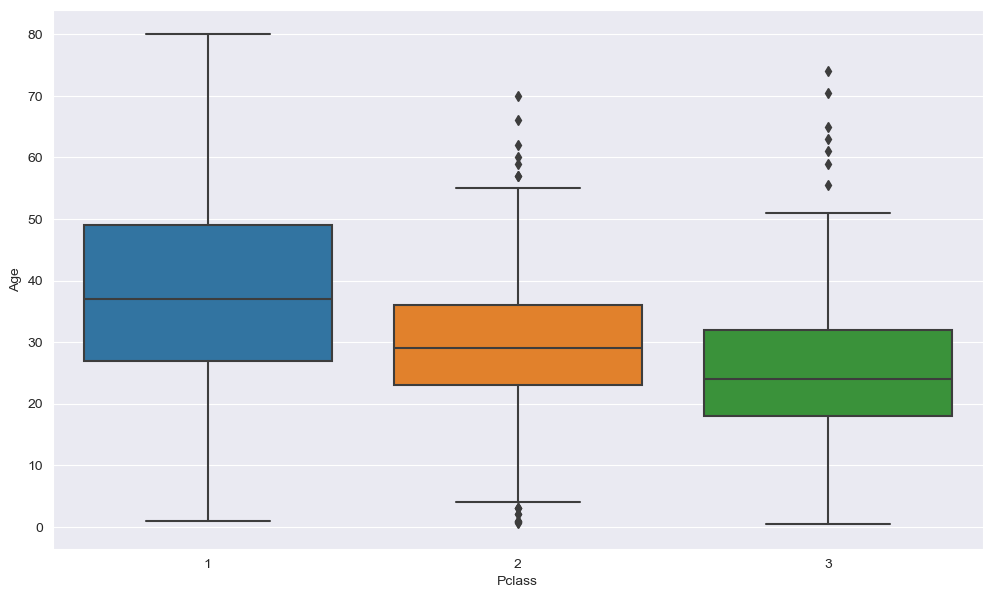

In [33]:
#we can average of people who have dies in each class using boxplot
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

so in pclass 1, most of the people are in 30 to 50 and pcclass 2 ,most of the people are in 22 to 36 and in 3,18 to 32


# data cleaning


In [40]:
#now we can add values according to the pclass and age category with function,let us see

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        
        if Pclass ==1:
            #we can change the null value with average value in the pclass 1 value
            return 37
        elif Pclass==2:
            #we can change the null value with average value in the pclass 2 value
            return 29
        else:
            #we can change the null value with average value in the pclass 3 value
            return 24
    else:
        return Age
        
        
        


In [42]:
#now let us change the null values with help of this function
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

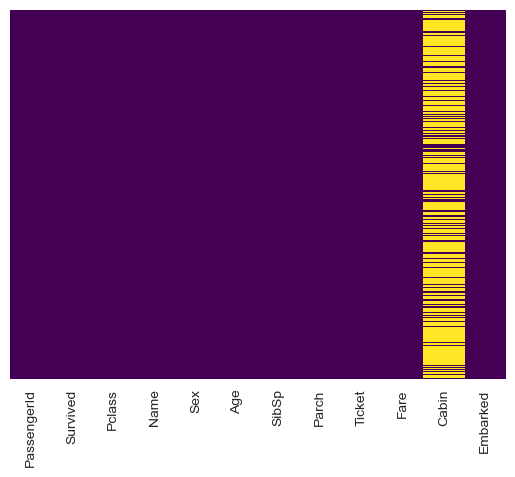

In [43]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

now we can see that there are no null values no more

In [46]:
#now let us see the cabin, as we see,that there is lot of nan values,so we can use feature engneering there ,but as of now just drop the col
df.drop('Cabin',axis=1,inplace=True)

<Axes: >

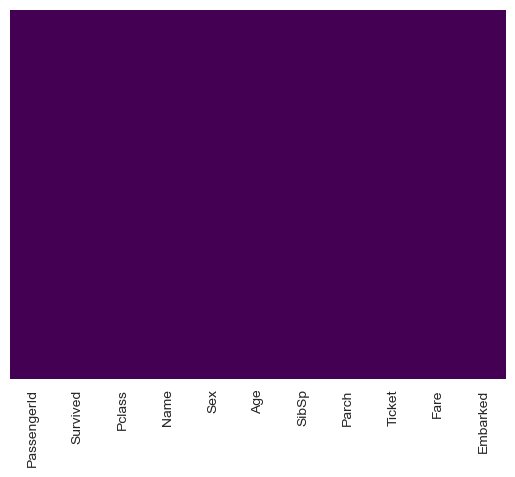

In [48]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

so, as for now there is no nan value present in the data

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# converting categorical features
we'll need to change the categorical features into dummy variables,unless the ml model won't be able to directly take in those features as inputs

In [55]:
## as we can see there are three categories in(s,c,q) in Embarked,we only need two ctegories so frop the first one
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
#same do for sex
pd.get_dummies(df['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [58]:
#now let assign variables so we can use them later
Sex=pd.get_dummies(df['Sex'],drop_first=True)
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [61]:
#now we dont't need PassengerId,name,ticket,sex and Embarked(as we turn the last two into dummy var)
df.drop(['PassengerId','Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [62]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [63]:
# now let concate the sex and embarke
df=pd.concat([df,Sex,Embarked],axis=1)

In [65]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


great our data is now ready

In [66]:
#now let us build the ml model